In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [ ]:
mnist=datasets.MNIST('./data',download=True)
threes=mnist.data[(mnist.targets==3)]/255.0
sevens=mnist.data[(mnist.targets==7)]/255.0
len(threes),len(sevens)

100%|██████████| 9912422/9912422 [00:00<00:00, 327930709.76it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 10218109.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 119548684.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17085676.03it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(6131, 6265)

In [ ]:
def show_image(img):
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

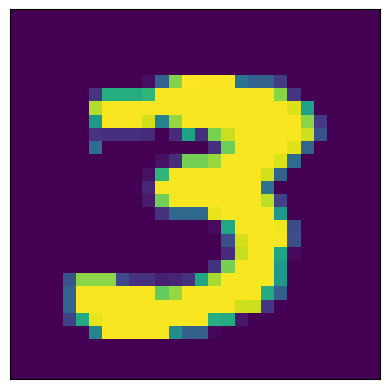

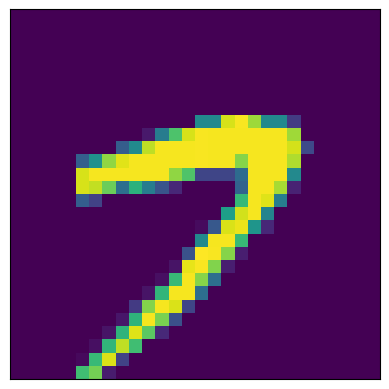

In [ ]:
show_image(threes[3])
show_image(sevens[8])

In [ ]:
print(threes.shape,sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


In [ ]:
combined_data=torch.cat([threes,sevens])
combined_data.shape

torch.Size([12396, 28, 28])

In [ ]:
flat_imgs=combined_data.view((-1,28*28))
flat_imgs.shape

torch.Size([12396, 784])

In [ ]:
target=torch.tensor([1]*len(threes)+[2]*len(sevens))
target.shape

torch.Size([12396])

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(x))

In [ ]:
def simple_nn(data,weights,bias):
  return sigmoid((data@weights) + bias)

In [ ]:
def error(pred,target):return ((pred-target)**2).mean()

In [ ]:
w=torch.randn((flat_imgs.shape[1],1),requires_grad=True)
b=torch.randn((1,1),requires_grad=True)

In [ ]:
for i in range(10000):
  pred=simple_nn(flat_imgs,w,b)
  loss=error(pred,target.unsqueeze(1))
  loss.backward()

  w.data-=0.001*w.grad.data
  b.data-=0.001*b.grad.data

  w.grad.zero_()
  b.grad.zero_()

print("Loss: ",loss.item())

Loss:  0.5445805788040161


In [ ]:
import numpy as np
import pandas  as pd

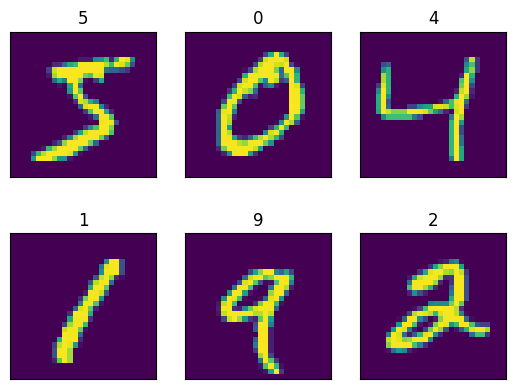

In [ ]:
def sample_mnist(row,col):
  for i in range(row*col):
    plt.subplot(row,col,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(mnist[i][1])
    plt.imshow(np.array(mnist[i][0]))
  plt.show()

sample_mnist(2,3)